## Load the data

In [133]:
#pip install qiskit==0.24.1
#pip install qiskit-aer==0.7.6
#pip install qiskit-aqua==0.8.2
#pip install qiskit-ignis==0.5.2
#pip install qiskit-terra==0.16.4
#pip install qiskit-ibmq-provider==0.12.2

In [34]:
from __future__ import division, print_function
import numpy as np
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import seaborn as sns
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import  f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [35]:
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap,ZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension

In [43]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
#from qiskit.aqua.components.feature_maps import SecondOrderExpansion

from qiskit import Aer
from qiskit.aqua.utils import split_dataset_to_data_and_labels

In [44]:
import numpy as np

from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

# Plot

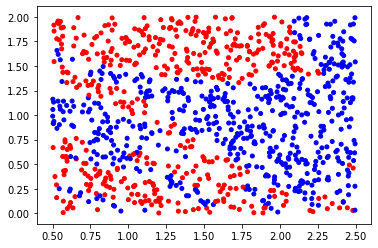

In [45]:
import numpy as np
import matplotlib.pyplot as plt 

#data=np.loadtxt("4x4.dat")
data=np.load('TrainQ.npy')

eps=0.25

def discrt(z):
    y=[]
    for x in z:
        if x < -eps         : y.append(0)
        if eps >= x >= -eps : y.append(1)
        if x >  eps         : y.append(1)
    return np.array(y)

col=["blue","red", "green"]

x=data[:,0]/100
y=data[:,1]/100
xy=data[:, 0:2]/100

z=discrt(data[:,3])

plt.scatter(x,y,c=[col[i] for i in z], s=16)

plt.show()


# Total data

In [46]:
import numpy as np
#sed = np.loadtxt('4x4.dat', unpack = True)

#sed.shape
#whole_data=sed.T

#an_array = whole_data
class_column = z
#print(class_column )
data_column=xy


In [47]:
x_data=data_column
y_data=class_column

scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)


In [48]:
x_0_data=[]
x_1_data=[]
y_0_data=[]
y_1_data=[]
for i in range(0, len(y_data)):
    if (y_data[i]==0):
        x_0_data.append((data[:,0]/100)[i])
        y_0_data.append((data[:,1]/100)[i])
    if (y_data[i]==1):
        x_1_data.append((data[:,0]/100)[i])
        y_1_data.append((data[:,1]/100)[i])
        
        

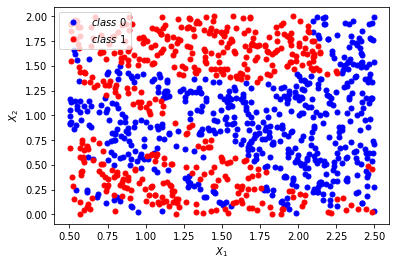

In [49]:
plt.figure(1)

plt.plot(x_0_data, y_0_data, linewidth = 3, linestyle='', marker='o', markersize=5, color='b', label= r'$class~ 0$')

plt.plot(x_1_data, y_1_data, linewidth = 3, linestyle='', marker='o', markersize=5, color='red', label= r'$class~ 1$')

#plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='m', label= r'$predicted~ right$')

#plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='orange', label= r'$predicted ~wrong$')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
plt.legend()
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

#  Train test split

In [82]:
n_samples=len(x_data)
total_indices = np.arange(n_samples)

In [83]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.1, random_state=4)

In [84]:
(
    x_train,
    x_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(x_data,y_data, total_indices, test_size=0.1)

# SVM and random forest

In [117]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [118]:
rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1).fit(x_train, y_train) 
poly = svm.SVC(kernel='poly', degree=3, C=10).fit(x_train, y_train) 

C:\Users\jbgho\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [119]:
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

In [120]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  65.00
F1 (Polynomial Kernel):  64.31


In [121]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (rbf Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (rbf Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (rbf Kernel):  77.00
F1 (rbf Kernel):  76.97


In [122]:
lin=svm.SVC(kernel='linear').fit(x_train, y_train)

In [123]:
lin_pred=lin.predict(x_test)

In [124]:
lin_accuracy = accuracy_score(y_test, lin_pred)
lin_f1 = f1_score(y_test, lin_pred, average='weighted')
print('Accuracy (lin Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (lin Kernel): ', "%.2f" % (lin_f1*100))
print(classification_report(y_test, lin_pred, digits=4))

Accuracy (lin Kernel):  72.00
F1 (lin Kernel):  71.92
              precision    recall  f1-score   support

           0     0.7414    0.7679    0.7544        56
           1     0.6905    0.6591    0.6744        44

    accuracy                         0.7200       100
   macro avg     0.7159    0.7135    0.7144       100
weighted avg     0.7190    0.7200    0.7192       100



# Quantum SVM

In [101]:
#class_labels=[-2,-1,0,1,2]
class_labels=[0,1]

In [102]:
training_size= len(x_train)
test_size= len(x_test)

In [104]:
sample_train=x_train
sample_test=x_test
label_train=y_train
label_test= y_test

In [105]:
training_input = {key: (sample_train[label_train == key, :])[:training_size]
                      for k, key in enumerate(class_labels)}
test_input = {key: (sample_test[label_test == key, :])[:test_size]
                  for k, key in enumerate(class_labels)}

In [106]:
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

In [107]:
feature_dimension=get_feature_dimension(training_input)
feature_dimension

2

In [125]:
seed = 10599
aqua_globals.random_seed = 10598

#backend = BasicAer.get_backend('statevector_simulator')

# def data_map_eq10(x: np.ndarray) -> float:
#     coeff = x[0] if len(x) == 1 else reduce(lambda m, n: np.pi*np.exp(((m - n)*(m - n))/8), x)
#     return coeff   np.pi*np.exp((x[0]*x[0])/8)



backend = BasicAer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)


# feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
#                            reps=2, entanglement='linear')  ### PauliFeatureMap entanglement='full'
#data_map = lambda x: np.exp(-(x[0]*x[0])/2)  # note: input is an array 
data_map = lambda x: x[0]
#feature_map = ZFeatureMap(feature_dimension=get_feature_dimension(training_input), reps=1, data_map_func=data_map)
feature_map = ZFeatureMap(feature_dimension=get_feature_dimension(training_input), reps=4, data_map_func=data_map)#, data_map_func=data_map)

svm = QSVM(feature_map, training_input, test_input, total_array,multiclass_extension=AllPairs())
#quantum_instance = QuantumInstance(backend, 
#                                   seed_simulator=aqua_globals.random_seed,
#                                   seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print(f'{k} : {v}')

Dataset has just two classes. Supplied multiclass extension will be ignored


testing_accuracy : 0.81
test_success_ratio : 0.81
predicted_labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1]
predicted_classes : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [126]:
train_features=x_train
train_labels= y_train
test_features=x_test
test_labels=y_test

predicts = svm.predict(test_features)
print("true    :", y_test)
print("predicts:", predicts)
print("score   :", result['testing_accuracy'])
#predicts

true    : [1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0]
predicts: [0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0]
score   : 0.81


In [127]:
predicts_right=0
for i in range(0, len(predicts)):
    if (predicts[i]== y_test[i]):
        predicts_right=predicts_right+1
        #print(y_test[i])
        
accuracy=predicts_right/len(predicts)
accuracy
                            


0.81

In [128]:
for i in range(0,len(predicts)):
    print(test_features[i], 'actual class', y_test[i], 'predicted', predicts[i])
    #if datapoints[1][i] == predicted_labels[i]:

[1.022 1.047] actual class 1 predicted 0
[1.798 1.651] actual class 1 predicted 1
[1.672 0.603] actual class 0 predicted 0
[2.177 1.926] actual class 0 predicted 0
[2.458 0.88 ] actual class 0 predicted 0
[0.923 1.272] actual class 1 predicted 1
[1.671 0.678] actual class 0 predicted 0
[1.523 0.391] actual class 1 predicted 1
[1.421 1.855] actual class 1 predicted 1
[2.362 1.956] actual class 0 predicted 0
[1.813 1.407] actual class 1 predicted 1
[2.18  0.404] actual class 0 predicted 0
[0.51  1.545] actual class 1 predicted 1
[1.307 1.628] actual class 1 predicted 1
[2.413 0.507] actual class 0 predicted 0
[1.108 0.909] actual class 0 predicted 0
[1.976 0.673] actual class 0 predicted 0
[1.    0.138] actual class 1 predicted 1
[0.536 1.142] actual class 0 predicted 0
[1.654 1.139] actual class 0 predicted 0
[1.745 0.817] actual class 0 predicted 0
[0.795 0.597] actual class 0 predicted 0
[1.408 0.867] actual class 0 predicted 0
[2.32  1.027] actual class 0 predicted 0
[2.326 1.467] ac

0


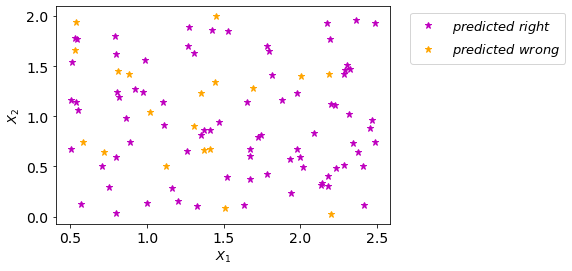

In [130]:
import numpy as np
import math 
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize, minimize_scalar
from scipy import integrate
%matplotlib inline

#plt.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 13}

mpl.rc('font', **font)

def example_inline():
    plt.clf()
x0_train=[]
y0_train=[]
x0_test=[]
y0_test=[]
x1_train=[]
y1_train=[]
x1_test=[]
y1_test=[]
    
#plt.figure(1)    
for i in range(0, len(x_train)):
    if y_train[i]==0 :
        x0_train.append(x_train[i][0])
        y0_train.append(x_train[i][1])
        
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
             #marker='o', markersize=3, color='blue', label= r'$Result ~from~ curve~ fitting$')
    else:
        x1_train.append(x_train[i][0])
        y1_train.append(x_train[i][1])
        #plt.plot(datapoints_train[0][i][0], datapoints_train[0][i][1], linestyle='', linewidth = 3, 
                 #marker='o', markersize=3, color='green', label= r'$Result ~from~ curve$')
        

        
for i in range(0, len(x_test)):
    if y_test[i]==predicts[i] :
        x0_test.append(x_test[i][0])
        y0_test.append(x_test[i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
             #marker='*', markersize=7, color='orange')
    else:
        x1_test.append(x_test[i][0])
        y1_test.append(x_test[i][1])
        #plt.plot(datapoints[0][i][0], datapoints[0][i][1], linestyle='', linewidth = 3, 
                 #marker='*', markersize=7, color='m')    
    #plt.xlabel(r'$\mathbf{X_1}$')
    #plt.ylabel(r'$\mathbf{x_2}$')
#plt.legend()
    #plt.show()
print(len(x0_train)-len(y0_train))

    
plt.figure(1)

#plt.plot(x0_train, y0_train, linewidth = 3, linestyle='', marker='o', markersize=2, color='b', label= r'$training ~class~ 0$')

#plt.plot(x1_train, y1_train, linewidth = 3, linestyle='', marker='o', markersize=2, color='green', label= r'$training ~class~ 1$')

plt.plot(x0_test, y0_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='m', label= r'$predicted~ right$')

plt.plot(x1_test, y1_test, linewidth = 3, linestyle='', marker='*', markersize=7, color='orange', label= r'$predicted ~wrong$')

plt.ylabel(r'$X_2$')
plt.xlabel(r'$X_1$')
#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    


In [132]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright